<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M25_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Elaborado por [Douglas Rizzi](https://www.linkedin.com/in/douglas-rizzi/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Flores

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

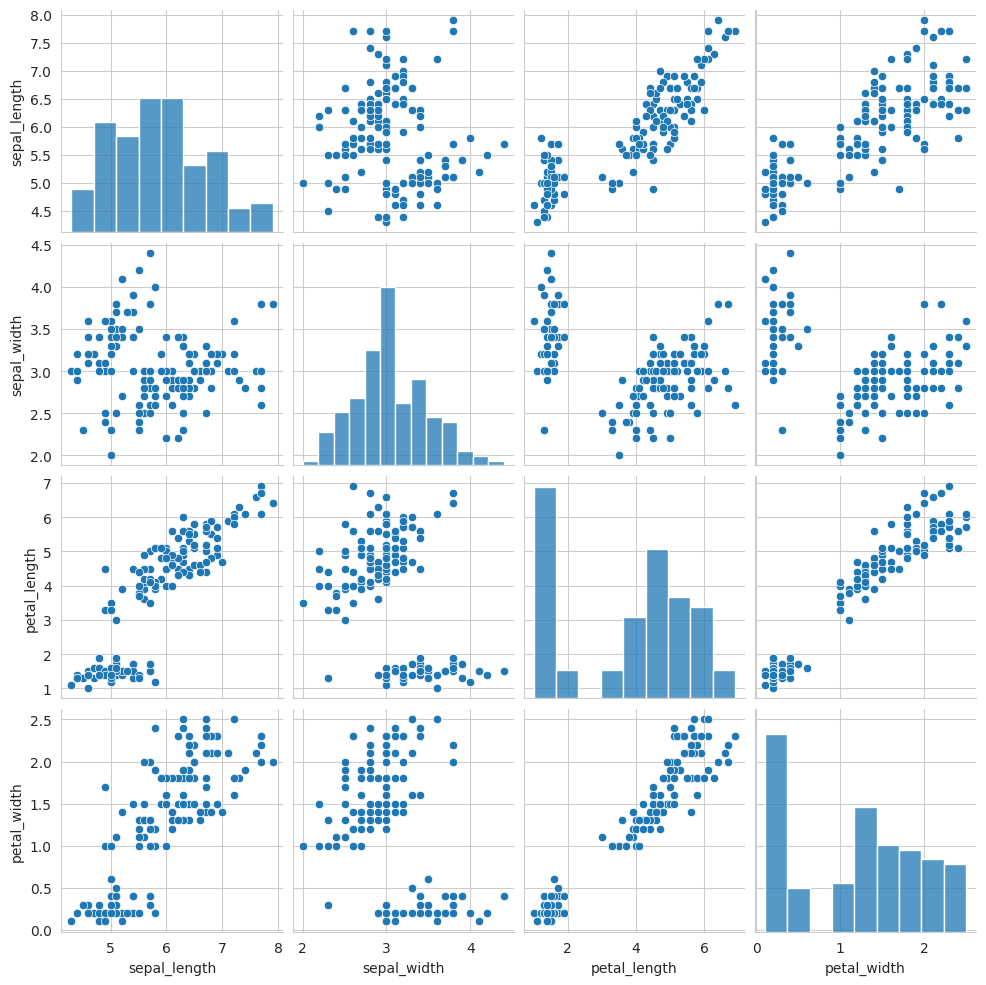

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris,)

**Comentário:** inicialmente observamos claremente que temos dois grandes grupos tanto quanto ao tamanho geral da sépala e da pétala, porém dentro de um desses grupos (clusters) parece haver um outra divisão menos perceptível.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [5]:
df = pd.DataFrame(iris)
missinss_values = df.isnull().mean()*100
print(missinss_values)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64


Observamos que não existem quaisquer valores faltantes na nossa base de dados.

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Todas as series do nosso data frame são do tipo 'float', e estão todos numa boa proporção uma vez que estão medidos todos em centímetros

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

Como não foram encontrados valores nulos nem houve a necessidade de padronizão de variáveis, nosso dataframe já se encontra limpo e pronto para ser usado no modelo de aprendizagem.

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [7]:
model = KMeans(n_clusters=5, n_init='auto')
model = model.fit(df)

In [8]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 '_tol': 0.00011356176666666667,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [7.475     , 3.125     , 6.3       , 2.05      ],
        [5.508     , 2.6       , 3.908     , 1.204     ],
        [6.52916667, 3.05833333, 5.50833333, 2.1625    ]]),
 '_n_features_out': 5,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
        0, 3, 0, 3, 0, 3, 0, 0, 0, 

In [9]:
# criando um data frame com os grupos
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [10]:
# anexando ao data frame original
clustered_data = pd.concat([df,clusters], axis=1)
clustered_data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


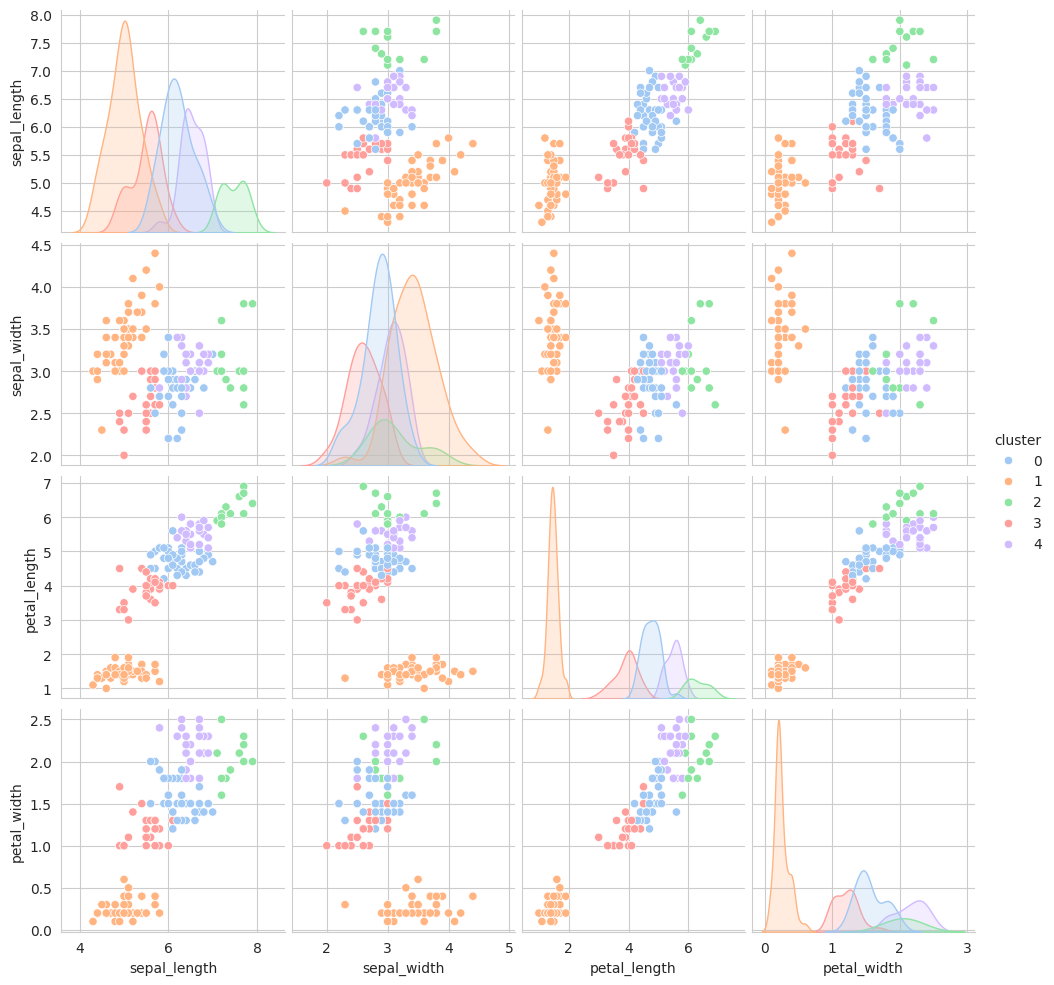

In [11]:
# visualizaçao do pairplot com os clusters
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette='pastel')

In [12]:
# criando um df para o centro dos 5 grupos
cluster_centers = model.cluster_centers_
cluster_centers = pd.DataFrame(cluster_centers, columns=['sepel_lenght','sepal_width','petal_lenght','petal_width'])
cluster_centers.head()

,sepel_lenght,sepal_width,petal_lenght,petal_width
0,6.207692,2.853846,4.746154,1.564103
1,5.006000,3.428000,1.462000,0.246000
2,7.475000,3.125000,6.300000,2.050000
3,5.508000,2.600000,3.908000,1.204000
4,6.529167,3.058333,5.508333,2.162500


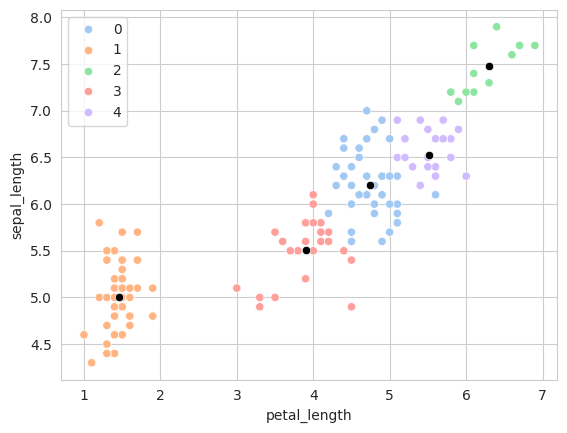

In [13]:
# visualizando os centros
with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots()
  sns.scatterplot(data=clustered_data, x='petal_length', y='sepal_length', hue='cluster', palette='pastel', ax=ax)
  sns.scatterplot(data=cluster_centers, x='petal_lenght', y ='sepel_lenght', color='black', ax=ax)

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [14]:
# gerando diversos modelos para aplicar o método do cotovelo
wcss = [] #criando uma lista para receber o wcss

# iterando para gerar modelos de até 10 grupos
for k in range(1,11):
  model = KMeans(n_clusters=k, n_init='auto')
  model = model.fit(df)
  wcss.append(model.inertia_)

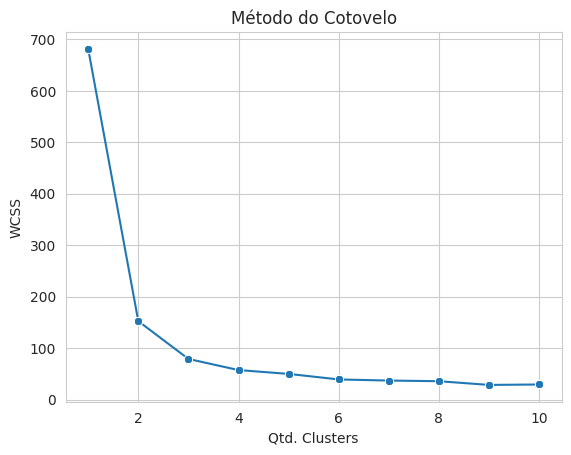

In [20]:
# gerando o gráfico de método de cotovelo para decidir o número de grupos
with sns.axes_style('whitegrid'):
  graficowcss = sns.lineplot(x=range(1,11), y=wcss, marker='8')
  graficowcss.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. Clusters');

Observamos que a curva do gráfico ocorre com mais intensidade entre dois e quatro grupos, logo a escolha do ponto central de **três grupo** é o mais indicado.

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [16]:
# realizando o treino e anexando o resultado ao df
model = KMeans(n_clusters=3, n_init='auto')
model = model.fit(df)

cluster = model.labels_
clustered_data = pd.concat([df, pd.DataFrame(cluster, columns=['cluster'])], axis=1)
clustered_data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

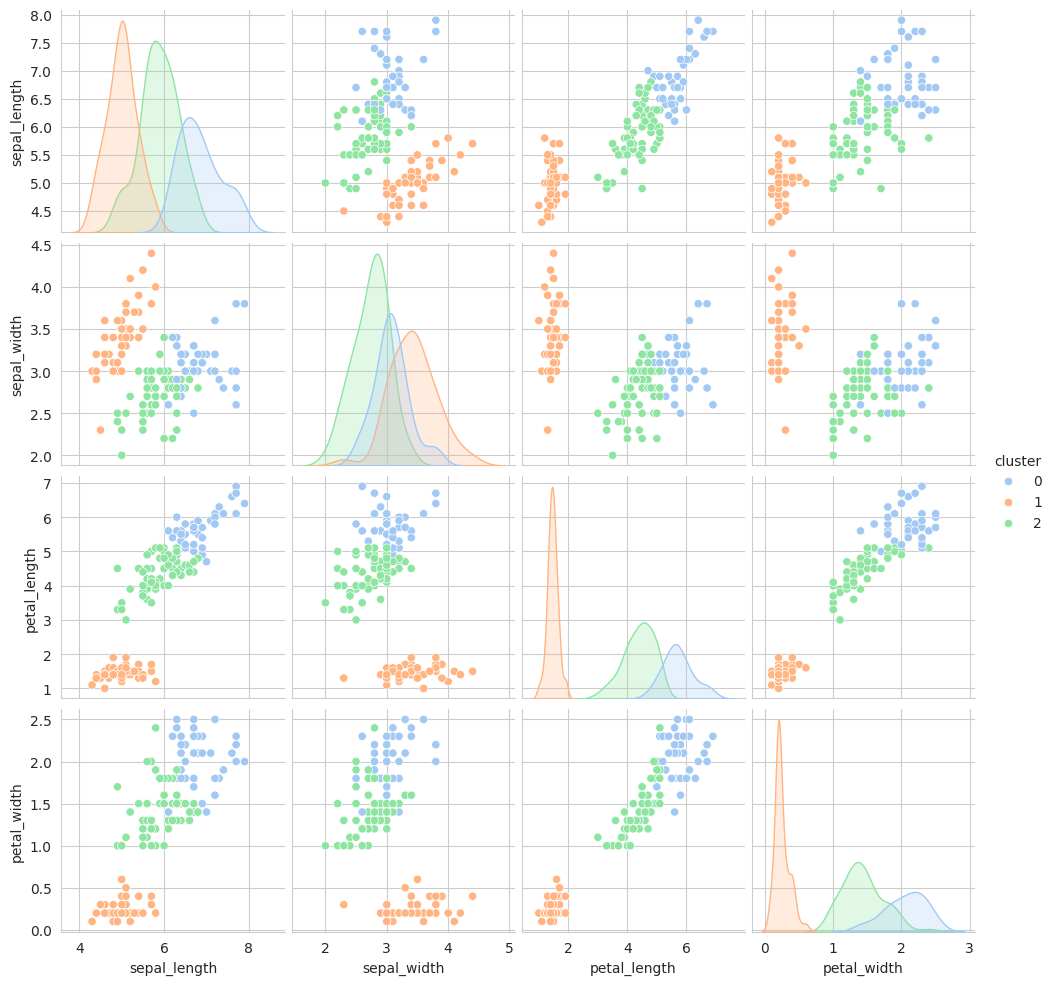

In [17]:
# gerando o pairplot com 3 clusters
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

**Comentário:** Identificamos que o número de clustes escolhidos parece comportar bem os dados. Uma vez que o cluster 1 está bem definito e suas características diferem bem dos outros, os clusters 0 e 2 estão mesclados, mas o modelo conseguiu definir uma boa linha de corte entre eles, chegando assim à três grupos bem definidos.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

In [18]:
# convertendo a nova flor em um array
flor_1 = np.array([5.1, 3.5, 1.4, 0.2])

In [19]:
# aplicando o modelo tendo como parâmetro a nova flor
cluster = model.predict(flor_1.reshape(1,-1))
print(f'A nova flor pertense ao grupo {cluster[0]}')

A nova flor pertense ao grupo 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---